# Battery life Prediction

ytlink :https://youtu.be/mqRWEDYCcUs?si=kMZmBX-3Co1GAZaz

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Dropout 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , LabelEncoder

In [2]:
df = pd.read_csv("cleaned_dataset/metadata.csv")
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN


In [3]:
df = df.drop(columns=["start_time","battery_id","test_id","uid","filename"])
df.head()

,type,ambient_temperature,Capacity,Re,Rct
0,discharge,4,1.6743047446975208,NaN,NaN
1,impedance,24,NaN,0.05605783343888099,0.20097016584458333
2,charge,4,NaN,NaN,NaN
3,impedance,24,NaN,0.05319185850921101,0.16473399914864734
4,discharge,4,1.5243662105099023,NaN,NaN


In [4]:
df.dtypes

type                   object
ambient_temperature     int64
Capacity               object
Re                     object
Rct                    object
dtype: object

In [5]:
# Converting categorical data into numerical data 
df["Re"] = pd.to_numeric(df["Re"] , errors="coerce")
df["Rct"] = pd.to_numeric(df["Rct"] , errors="coerce")
df["Capacity"] = pd.to_numeric(df["Capacity"] , errors="coerce")

In [6]:
# Filling the missing values in  Re , Rct and Capacity with means

df["Re"].fillna(df["Re"].mean() , inplace=True)
df["Rct"].fillna(df["Re"].mean() , inplace=True)
df["Capacity"].fillna(df["Re"].mean() , inplace=True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_6344\2082402521.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Re"].fillna(df["Re"].mean() , inplace=True)
C:\Users\Hp\AppData\Local\Temp\ipykernel_6344\2082402521.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, whe

In [7]:
df.isna().sum()

type                   0
ambient_temperature    0
Capacity               0
Re                     0
Rct                    0
dtype: int64

In [10]:
df["type"].unique()

array(['discharge', 'impedance', 'charge'], dtype=object)

# Encoding the type data

In [11]:
le = LabelEncoder()
df["type"] = le.fit_transform(df["type"])

In [12]:
df["type"].head()

0    1
1    2
2    0
3    2
4    1
Name: type, dtype: int64

discharge = 1 , impedance = 2 , charge = 0

In [17]:
# Train test split

x = df.drop(columns=["ambient_temperature"])
y = df["ambient_temperature"]

In [18]:
x

,type,Capacity,Re,Rct
0,1,1.674305e+00,-4.976500e+11,-4.976500e+11
1,2,-4.976500e+11,5.605783e-02,2.009702e-01
2,0,-4.976500e+11,-4.976500e+11,-4.976500e+11
3,2,-4.976500e+11,5.319186e-02,1.647340e-01
4,1,1.524366e+00,-4.976500e+11,-4.976500e+11
...,...,...,...,...
7560,2,-4.976500e+11,9.680880e-02,1.548974e-01
7561,1,1.020138e+00,-4.976500e+11,-4.976500e+11
7562,0,-4.976500e+11,-4.976500e+11,-4.976500e+11
7563,1,9.907592e-01,-4.976500e+11,-4.976500e+11


In [19]:
y

0        4
1       24
2        4
3       24
4        4
        ..
7560    24
7561     4
7562     4
7563     4
7564     4
Name: ambient_temperature, Length: 7565, dtype: int64

In [21]:
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,  random_state = 42)

In [22]:
print(x_train.shape , x_test.shape ,y_train.shape , y_test.shape)

(6052, 4) (1513, 4) (6052,) (1513,)


# Scaling of the data 

In [23]:
scaler = MinMaxScaler() 
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
print("Scaled X_train: \n",x_train[:5])

Scaled X_train: 
 [[1.         0.         1.         0.99999985]
 [0.5        1.         0.         0.        ]
 [0.5        1.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.5        1.         0.         0.        ]]


# Model Building 

In [28]:
model = Sequential([
    Dense(64, activation="relu" , input_dim=x_train.shape[1]), # Input layer 
    Dropout(0.2) ,
    Dense(32 , activation="relu"),
    Dropout(0.2), 
    Dense(1, activation="linear")
    
]) 

#compilation of the model
model.compile(optimizer="adam",loss="mean_squared_error" , metrics=["mse"])

model.summary()



D:\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,433 (9.50 KB)

 Trainable params: 2,433 (9.50 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Training the data model 
history = model.fit(x_train , y_train , epochs=150 , batch_size=32 , validation_data = (x_test , y_test))

Epoch 1/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 397.7581 - mse: 397.7581 - val_loss: 109300.3984 - val_mse: 109300.3984
Epoch 2/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 137.3221 - mse: 137.3221 - val_loss: 100838.2578 - val_mse: 100838.2578
Epoch 3/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 126.3987 - mse: 126.3987 - val_loss: 100844.6562 - val_mse: 100844.6562
Epoch 4/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 117.5175 - mse: 117.5175 - val_loss: 99412.7812 - val_mse: 99412.7812
Epoch 5/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 122.2194 - mse: 122.2194 - val_loss: 97691.3125 - val_mse: 97691.3125
Epoch 6/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 124.4887 - mse: 124.4887 - val_loss: 95513.9531 - val_mse: 95513.9531
Epoch 7/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 120.1722 - mse: 120.1722 - val_loss: 101431.2578 - val_mse: 101431.2578
Epoch 8/150
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 118.7843 - mse

# Model Evaluation 

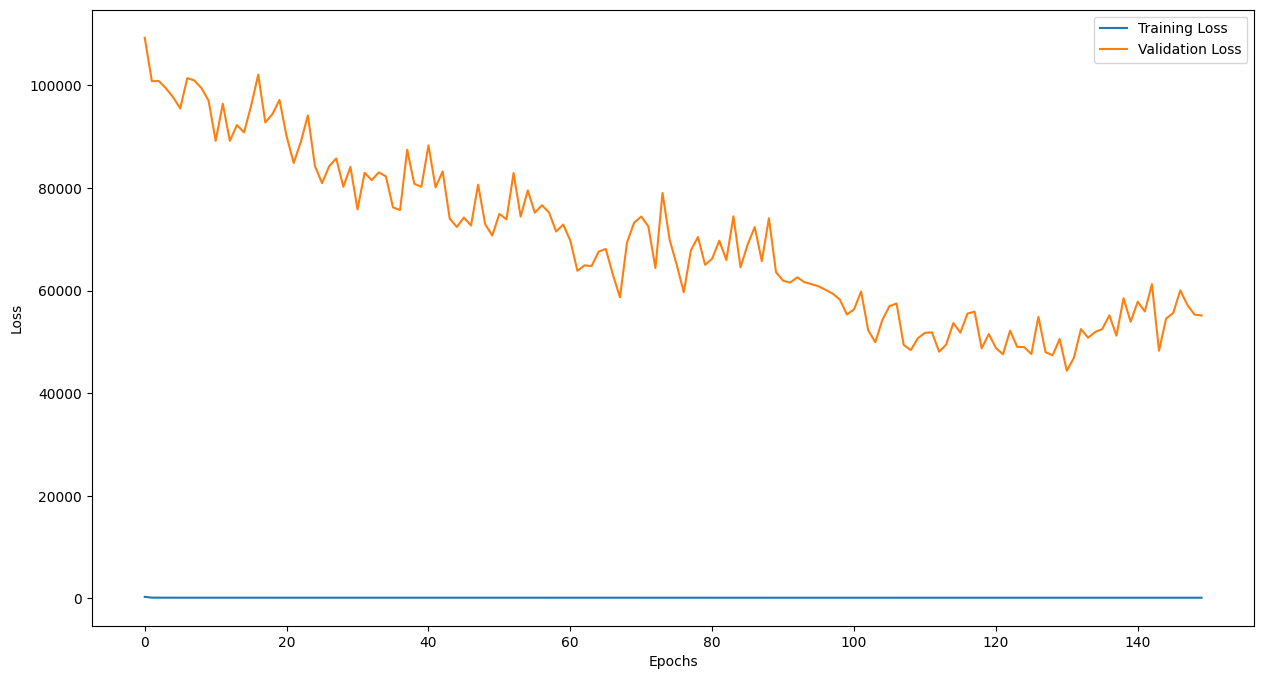

In [32]:
plt.figure(figsize=(15,8))
plt.plot(history.history["loss"] ,label="Training Loss")
plt.plot(history.history["val_loss"] , label="Validation Loss") 
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

In [34]:
# Evaluate the model on the test data
mse = model.evaluate(x_test, y_test)

# Print the Mean Squared Error (MSE)
print(f'Mean Squared Error on test set: {mse}')


48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 184909.9844 - mse: 184909.9844
Mean Squared Error on test set: [55144.41796875, 55144.41796875]


# Predictive System 

In [35]:
def predict_battery_life(type_discharge, Capacity, Re, Rct, label_encoder, scaler, model):
    
    # Encode the categorical feature
    type_discharge_encoded = label_encoder.transform([type_discharge])[0]
    
    # Prepare the input feature vector
    X_input = np.array([[type_discharge_encoded,Capacity, Re, Rct]])
    
    # Scale the input features using the same scaler
    X_input_scaled = scaler.transform(X_input)
    
    # Predict the battery life (ambient_temperature)
    predicted_battery_life = model.predict(X_input_scaled)
    
    return predicted_battery_life[0]

In [37]:
# Example usage of the function
type_discharge = 'discharge'  # Example input for type
Capacity = 1.674305           # Example numeric value
Re = -4.976500e+11            # Example numeric value
Rct = 1.055903e+12            # Example numeric value

# Call the prediction function
predicted_battery_life = predict_battery_life(type_discharge, Capacity, Re, Rct, le, scaler, model)

print(f"Predicted Battery Life: {predicted_battery_life}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
Predicted Battery Life: [27.174952]


D:\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
